In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
a = pd.read_csv('train.csv')
b= pd.read_csv('test.csv')
a.shape, b.shape

((1460, 81), (1459, 80))

In [3]:
a.columns, b.columns

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [4]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

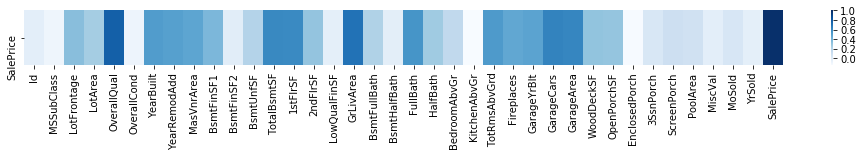

In [6]:
num= a.select_dtypes(exclude= 'object')
numcorr= num.corr()
f,ax= plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by= 'SalePrice', ascending= False).head(1), cmap= 'Blues')
plt.show()

In [7]:
num= numcorr['SalePrice'].sort_values(ascending= False).head(10).to_frame()
num

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


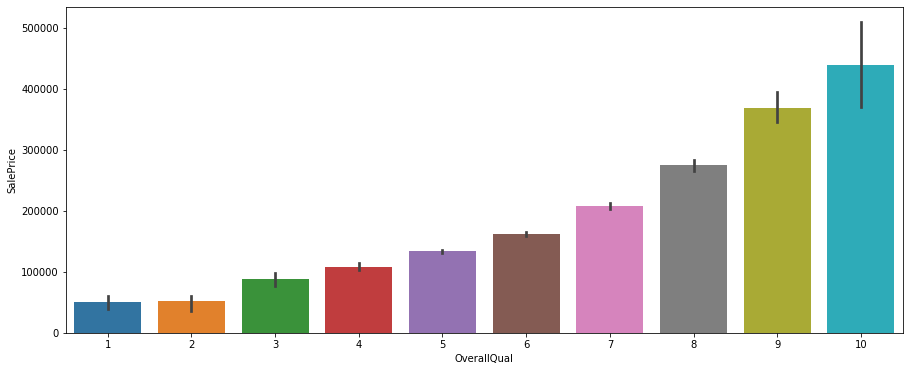

In [8]:
plt.figure(figsize=(15,6))
sns.barplot(x= a['OverallQual'], y= a['SalePrice'])

In [9]:
a[['OverallQual','SalePrice']].groupby(['OverallQual']).mean().sort_values(by= 'SalePrice', ascending= False)

,SalePrice
OverallQual,
10,438588.388889
9,367513.023256
8,274735.535714
7,207716.423197
6,161603.034759
5,133523.347607
4,108420.655172
3,87473.750000
2,51770.333333


,SalePrice
GrLivArea,
4316,755000.0
4476,745000.0
3627,625000.0
2364,611657.0
2822,582933.0
...,...
693,52500.0
729,52000.0
1317,40000.0


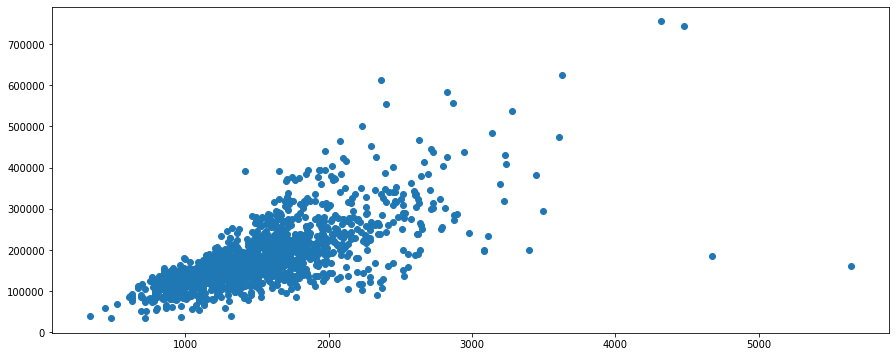

In [10]:
plt.figure(figsize=(15,6))
plt.scatter(x= a['GrLivArea'], y= a['SalePrice'])
a[['GrLivArea','SalePrice']].groupby(['GrLivArea']).mean().sort_values(by= 'SalePrice', ascending= False)


,SalePrice
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


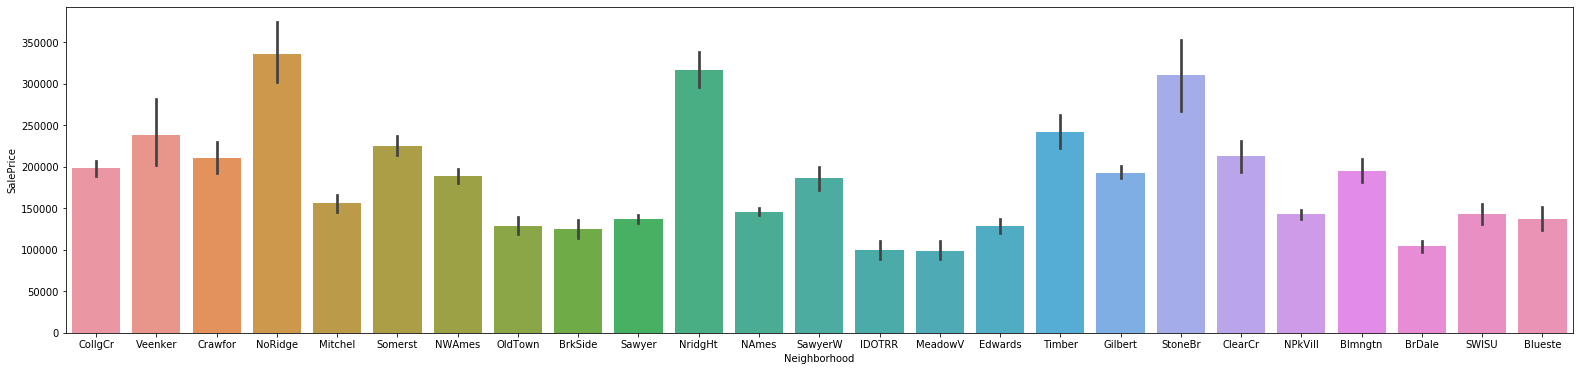

In [11]:
plt.figure(figsize=(27,6))
sns.barplot(x= a['Neighborhood'], y= a['SalePrice'])
a[['Neighborhood','SalePrice']].groupby(['Neighborhood']).count().sort_values(by= 'SalePrice', ascending= False)


,SalePrice
GarageCars,
2,824
1,369
3,181
0,81
4,5


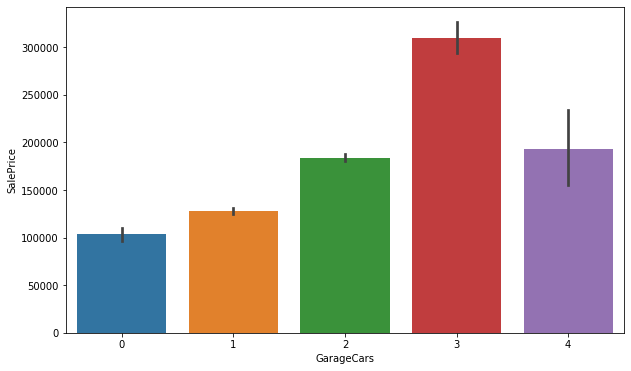

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x= a['GarageCars'], y= a['SalePrice'])
a[['GarageCars','SalePrice']].groupby(['GarageCars']).count().sort_values(by= 'SalePrice', ascending= False)


,SalePrice
GarageArea,
832,755000.0
813,745000.0
807,625000.0
1020,582933.0
716,556581.0
...,...
1248,81000.0
200,79125.0
189,78000.0


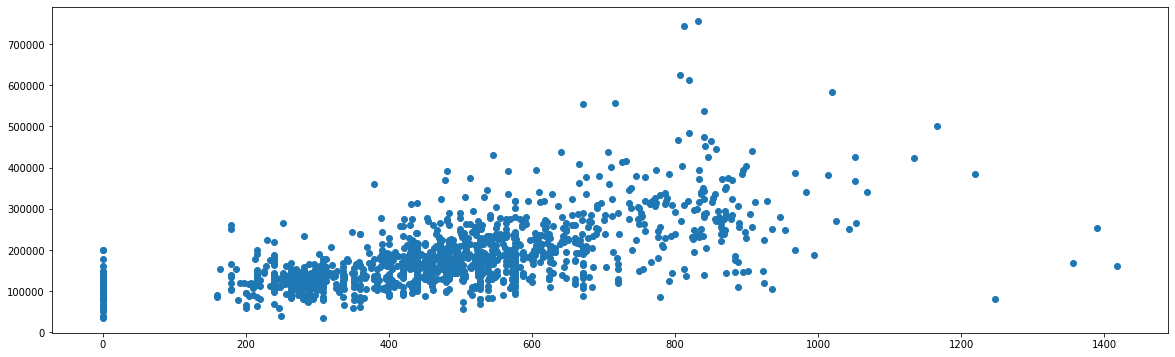

In [13]:
plt.figure(figsize=(20,6))
plt.scatter(x= a['GarageArea'], y= a['SalePrice'])
a[['GarageArea','SalePrice']].groupby(['GarageArea']).mean().sort_values(by= 'SalePrice', ascending= False)


,SalePrice
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


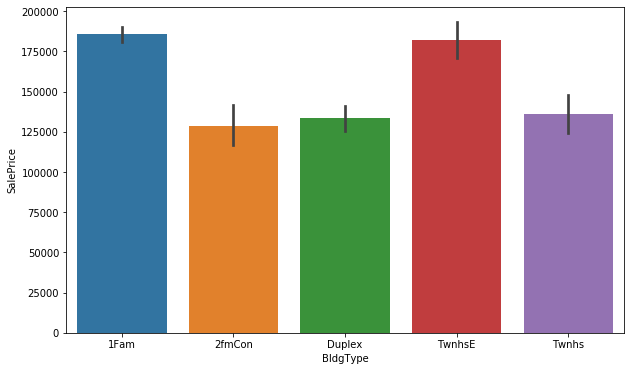

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x= a['BldgType'], y= a['SalePrice'])
a[['BldgType','SalePrice']].groupby(['BldgType']).count().sort_values(by= 'SalePrice', ascending= False)


In [15]:
a.isnull().sum().sort_values(ascending= False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [16]:
a_mis= a[['PoolQC','MiscFeature','Alley','Fence']]
a.drop(labels= a_mis, axis= 1, inplace= True)
a_mis1=(a.isnull().sum().sort_values(ascending= False))
q=(a_mis1[a_mis1>0])



In [17]:
q.dtypes, print(q)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64


(dtype('int64'), None)

In [18]:
b.isnull().sum().sort_values(ascending= False).head(25)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [19]:
b_mis= b[['PoolQC','MiscFeature','Alley','Fence']]
b.drop(labels= b_mis, axis= 1, inplace= True)
b_mis1=(b.isnull().sum().sort_values(ascending= False))
w=(b_mis1[b_mis1>0])
w.dtypes, print(w)

FireplaceQu     730
LotFrontage     227
GarageCond       78
GarageQual       78
GarageYrBlt      78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
BsmtHalfBath      2
Utilities         2
Functional        2
BsmtFullBath      2
BsmtUnfSF         1
SaleType          1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
TotalBsmtSF       1
GarageCars        1
KitchenQual       1
GarageArea        1
dtype: int64


(dtype('int64'), None)

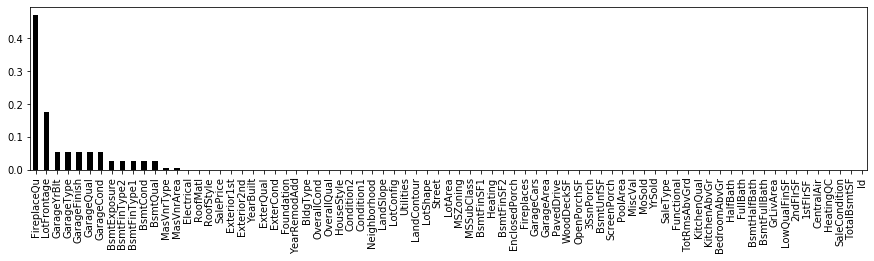

In [20]:
plt.figure(figsize= (15,3))
a.isnull().mean().sort_values(ascending=False).plot.bar(color= 'black')

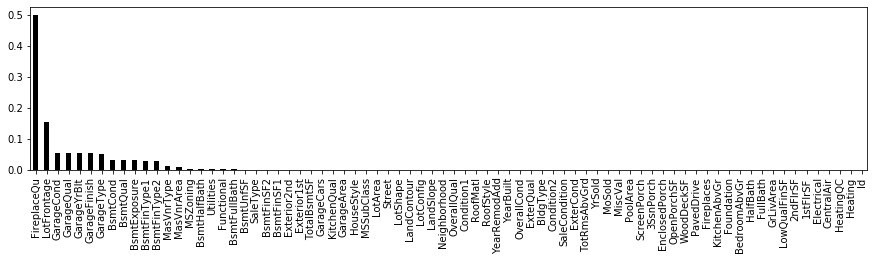

In [21]:
plt.figure(figsize= (15,3))
b.isnull().mean().sort_values(ascending=False).plot.bar(color= 'black')

In [22]:
na= a.shape[0]

In [23]:
nb= b.shape[0]

In [24]:
#Y_train= a['SalePrice'].to_frame()
cmb= pd.concat((a,b), sort= False).reset_index(drop= True)
cmb.shape

(2919, 77)

In [25]:
cmb.drop(labels= cmb[[ 'Id', 'FireplaceQu']], axis= 1, inplace= True)
cmb.shape

(2919, 75)

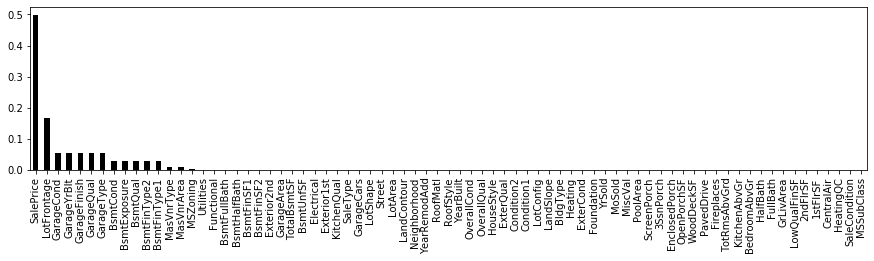

In [26]:
plt.figure(figsize= (15,3))
cmb.isnull().mean().sort_values(ascending=False).plot.bar(color= 'black')

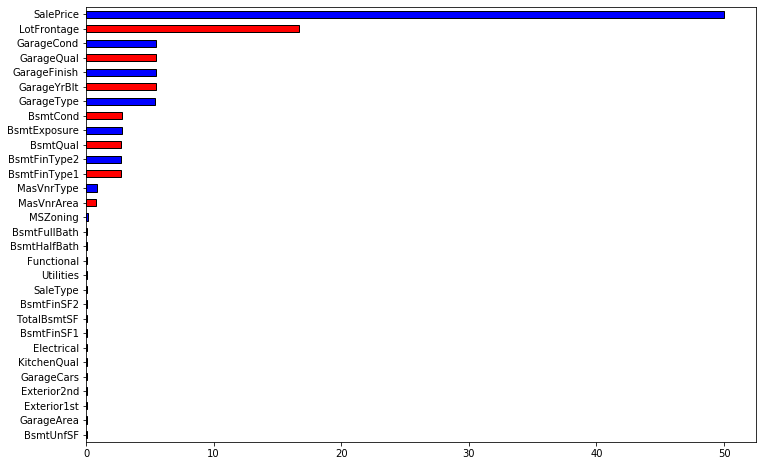

In [27]:
allmis= (cmb.isnull().sum()/ len(cmb))*100
allmis= allmis.drop(allmis[allmis == 0].index).sort_values()
plt.figure(figsize=(12,8))
allmis.plot.barh(color= ('red',"blue"), edgecolor= 'black')
plt.show()

In [28]:
NA=cmb[['LotFrontage','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd','TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]

In [29]:
Nacat= NA.select_dtypes(include= 'object')
Nanum= NA.select_dtypes(exclude= 'object')
Nacat.shape[1], Nanum.shape[1]

(18, 11)

In [30]:
Nacat.columns, Nanum.columns

(Index(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
        'MasVnrType', 'Electrical', 'MSZoning', 'Utilities', 'Functional',
        'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType'],
       dtype='object'),
 Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath',
        'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
        'BsmtFinSF2', 'BsmtFinSF1'],
       dtype='object'))

In [31]:
Nacat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


In [32]:
Nanum.head()

,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,65.0,2003.0,196.0,1.0,0.0,150.0,856.0,548.0,2.0,0.0,706.0
1,80.0,1976.0,0.0,0.0,1.0,284.0,1262.0,460.0,2.0,0.0,978.0
2,68.0,2001.0,162.0,1.0,0.0,434.0,920.0,608.0,2.0,0.0,486.0
3,60.0,1998.0,0.0,1.0,0.0,540.0,756.0,642.0,3.0,0.0,216.0
4,84.0,2000.0,350.0,1.0,0.0,490.0,1145.0,836.0,3.0,0.0,655.0


In [33]:
Nacat1= Nacat.isnull().sum().to_frame().sort_values(by=[0]).T
Nacat1

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [34]:
Nanum1= Nanum.isnull().sum().to_frame().sort_values(by=[0]).T
Nanum1

,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1,BsmtFullBath,BsmtHalfBath,MasVnrArea,GarageYrBlt,LotFrontage
0,1,1,1,1,1,1,2,2,23,159,486


In [35]:
cmb[['MasVnrArea','GarageYrBlt', 'LotFrontage']].describe()

,MasVnrArea,GarageYrBlt,LotFrontage
count,2896.000000,2760.000000,2433.000000
mean,102.201312,1978.113406,69.305795
std,179.334253,25.574285,23.344905
min,0.000000,1895.000000,21.000000
25%,0.000000,1960.000000,59.000000
50%,0.000000,1979.000000,68.000000
75%,164.000000,2002.000000,80.000000
max,1600.000000,2207.000000,313.000000


In [36]:
cmb[['MasVnrArea','GarageYrBlt', 'LotFrontage']].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
LotFrontage      68.0
dtype: float64

In [37]:
cmb['MasVnrArea']= cmb['MasVnrArea'].fillna(0)
cmb['LotFrontage']= cmb['LotFrontage'].fillna(cmb['LotFrontage'].median())
cmb['GarageYrBlt']= cmb['GarageYrBlt'].fillna(1979)

In [38]:
Nacols= cmb.columns
for col in Nacols:
    if cmb[col].dtype != 'object':
        cmb[col]= cmb[col].fillna(0)

In [39]:
Nacat1= Nacat.isnull().sum().to_frame().sort_values(by=[0]).T
Nacat1

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [40]:
cmb['SaleType']= cmb['SaleType'].fillna(method= 'ffill')
cmb['Exterior2nd']= cmb['Exterior2nd'].fillna(method= 'ffill')
cmb['Exterior1st']= cmb['Exterior1st'].fillna(method= 'ffill')
cmb['KitchenQual']= cmb['KitchenQual'].fillna(method= 'ffill')
cmb['Electrical']= cmb['Electrical'].fillna(method= 'ffill')
cmb['Functional']= cmb['Functional'].fillna(method= 'ffill')
cmb['Utilities']= cmb['Utilities'].fillna(method= 'ffill')
cmb['MSZoning']= cmb['MSZoning'].fillna(method= 'ffill')

In [41]:
for col in Nacols:
    if cmb[col].dtype == 'object':
        cmb[col]= cmb[col].fillna('None')

In [42]:
cmb.isnull().sum().sort_values(ascending= False).head(74)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Length: 74, dtype: int64

In [43]:
cmb.shape

(2919, 75)

In [44]:
cmb.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [45]:
cmb.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.088386,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,42.517628,21.317898,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [46]:
z= cmb.select_dtypes(include= 'object')
z.columns, z.shape

(Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'), (2919, 38))

In [47]:
z.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [48]:
z['Electrical'].value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [49]:
x=cmb.select_dtypes(exclude= 'object')
x.columns, x.shape

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'), (2919, 37))

In [50]:
x.info

<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
2914         160         21.0     1936            4            7       1970   
2915         160         21.0     1894            4            5       1970   
2916          20        160.0    20000            5            7       1960   
2917          85         62.0    10441            5            5       1992   
2918          60         74.0     9627            7            5       1993   

      YearRemodAdd 

In [51]:
cmb['TotalArea']= cmb['TotalBsmtSF']+ cmb['1stFlrSF']+ cmb['2ndFlrSF'] + cmb['GrLivArea'] + cmb['GarageArea']
cmb['Bathrooms'] = cmb['FullBath'] + cmb['HalfBath']*0.5
cmb['Year_Average']= (cmb['YearRemodAdd'] + cmb['YearBuilt'])/2



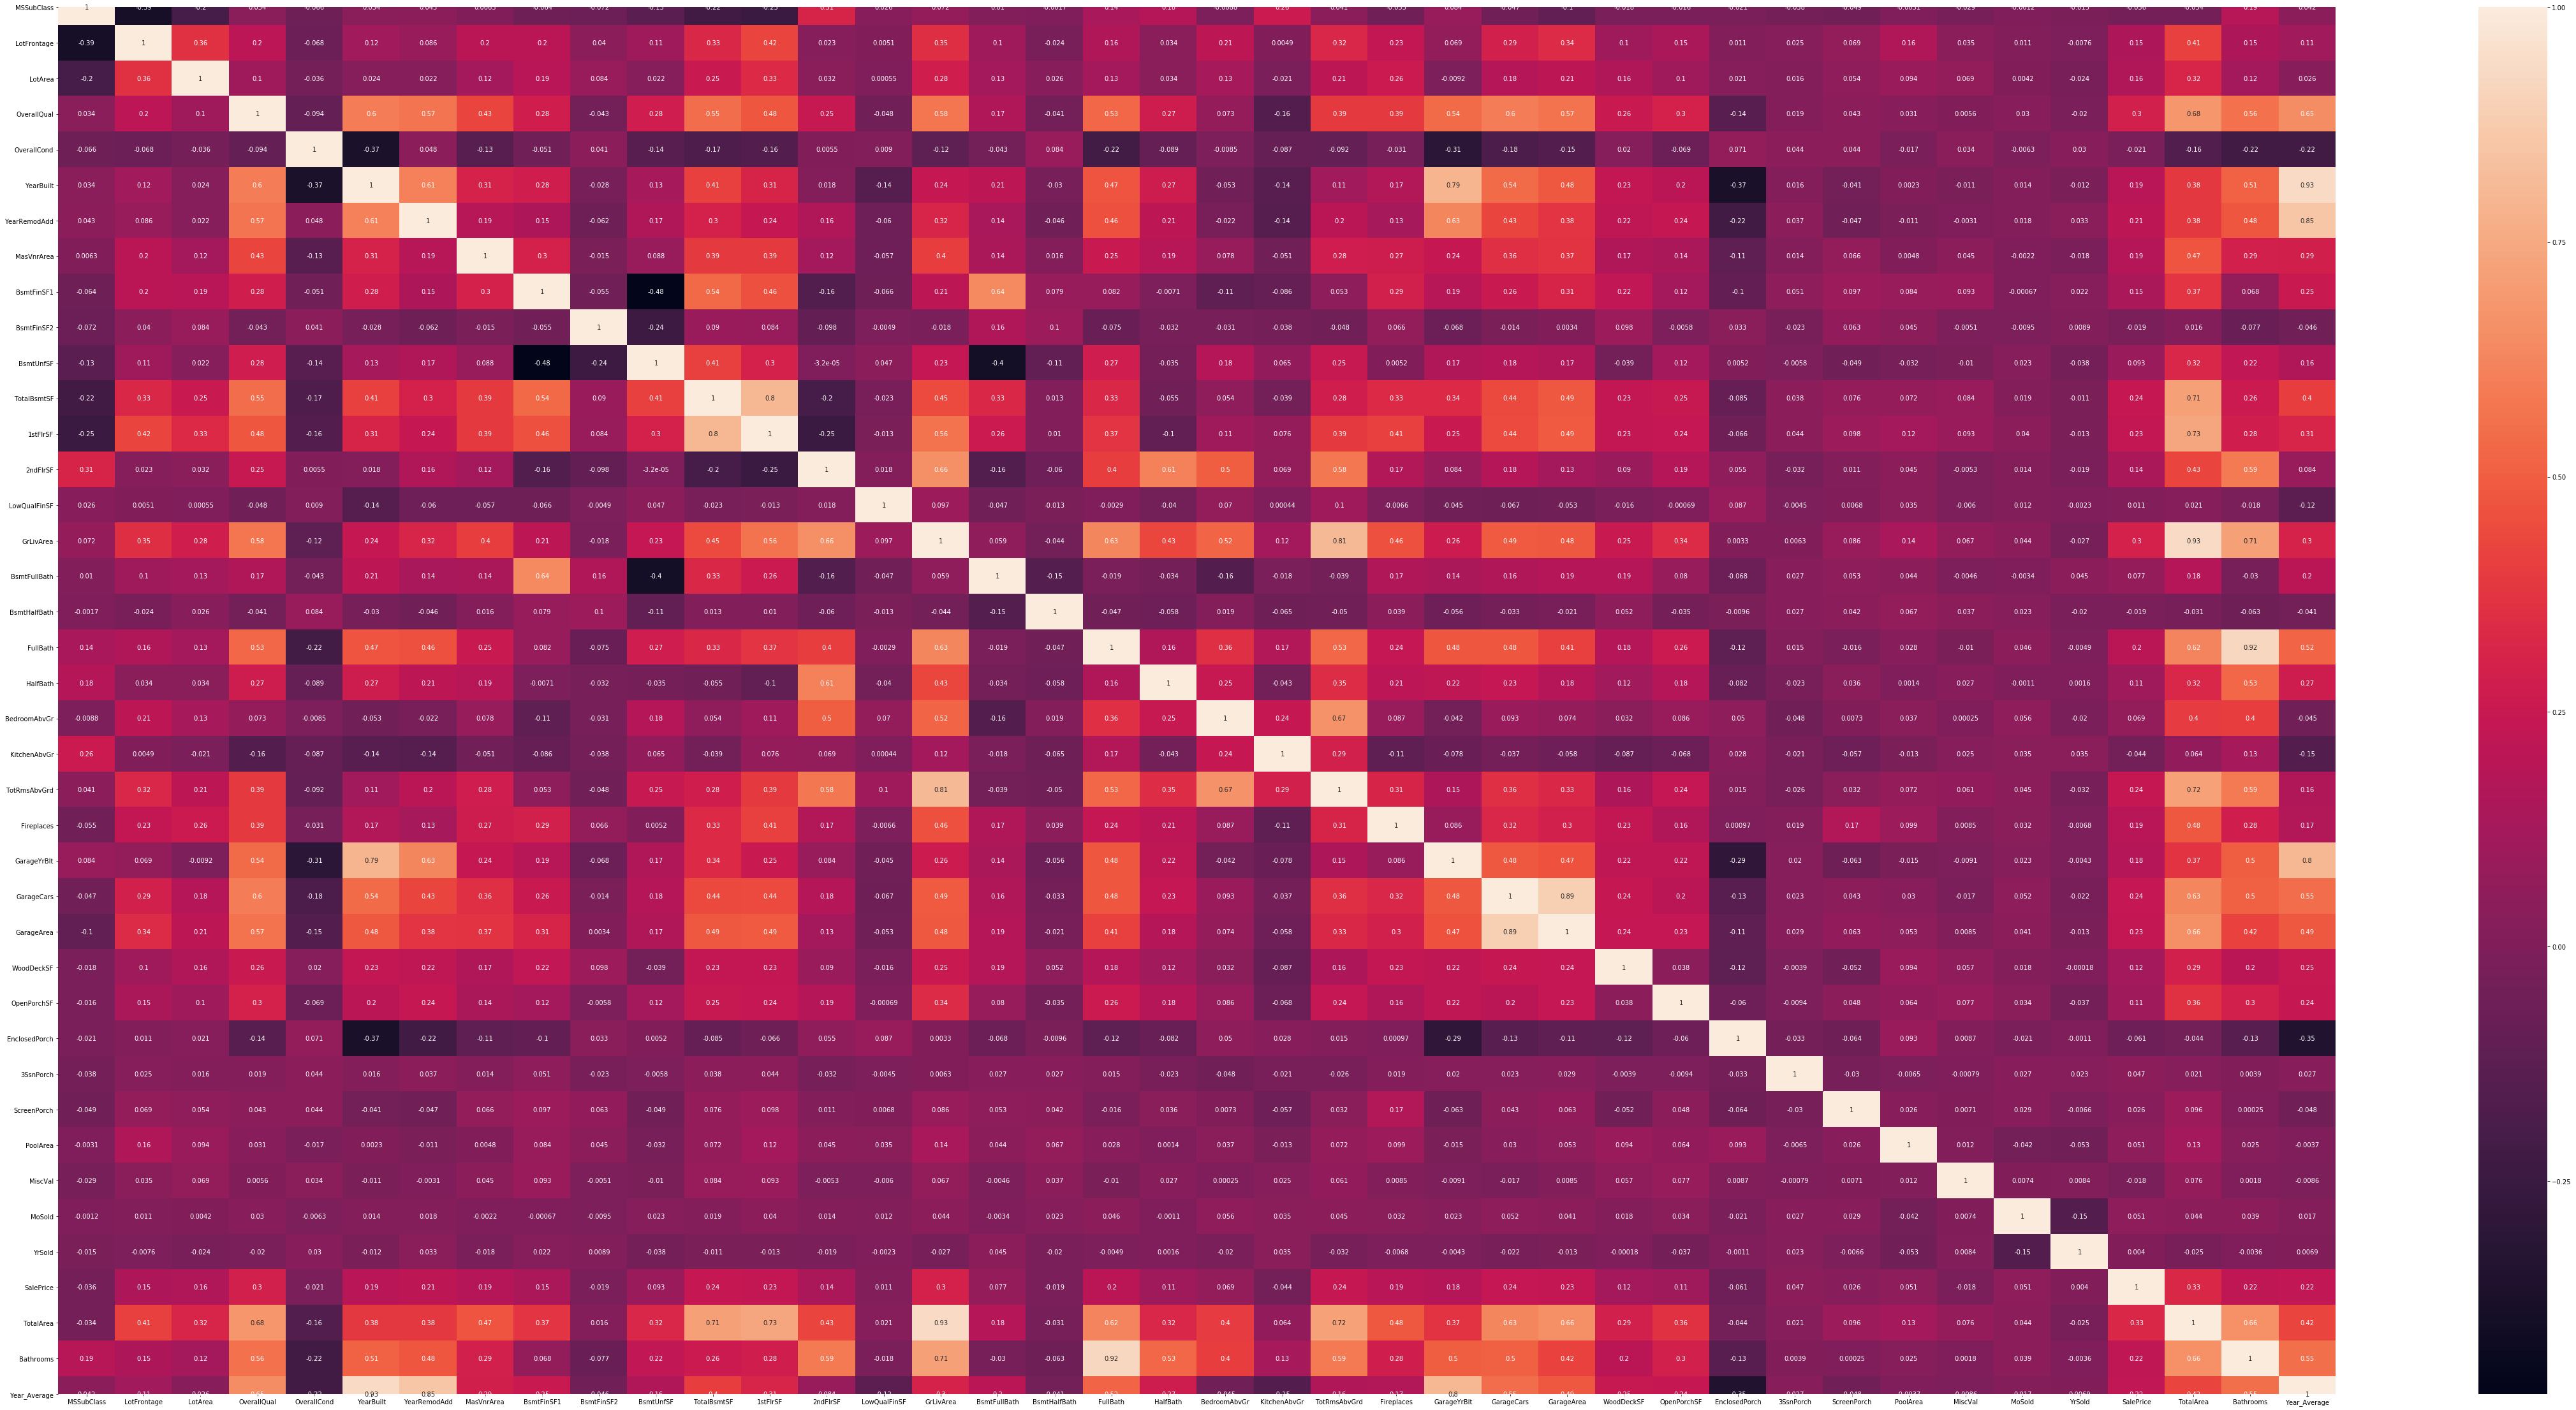

In [52]:
plt.figure(figsize=(80,40))
sns.heatmap(cmb.corr(), annot= True)

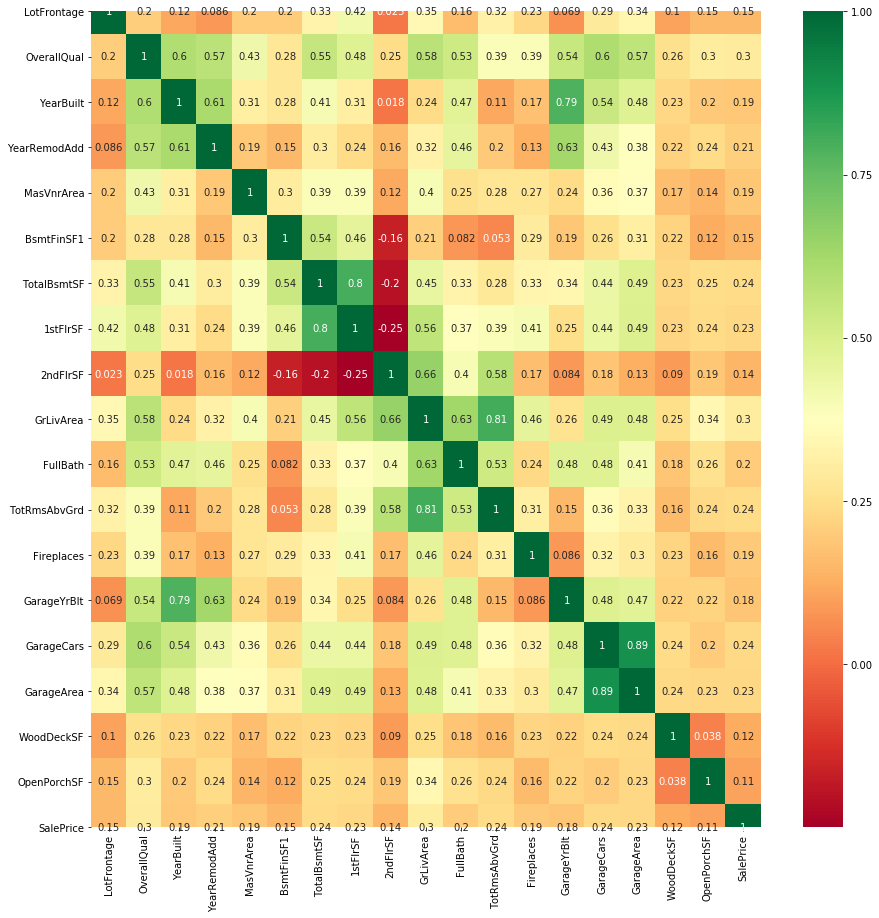

In [53]:
corr= a.corr()
most_corr_features= corr.index[abs(corr['SalePrice'])>0.3]
plt.figure(figsize=(15,15))
sns.heatmap(cmb[most_corr_features].corr(), annot= True, cmap= 'RdYlGn')

In [54]:
cmb.shape

(2919, 78)

In [55]:
a= a[a['GrLivArea']<4000]

In [56]:
print(a.select_dtypes(exclude= 'object').columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [57]:


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split


In [58]:
cmb['MoSold']= cmb['MoSold'].astype(str)
cmb['MSSubClass']= cmb['MSSubClass'].apply(str)
cmb['YrSold']= cmb['YrSold'].astype(str)

In [59]:
cb= pd.get_dummies(cmb)
cb.shape

(2919, 313)

In [60]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 313 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(15), int64(22), uint8(276)
memory usage: 1.6 MB


In [61]:
cb.dtypes

LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 313, dtype: object

In [62]:
c=cb.select_dtypes(include= 'object')
c.columns

Index([], dtype='object')

In [63]:
cb.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


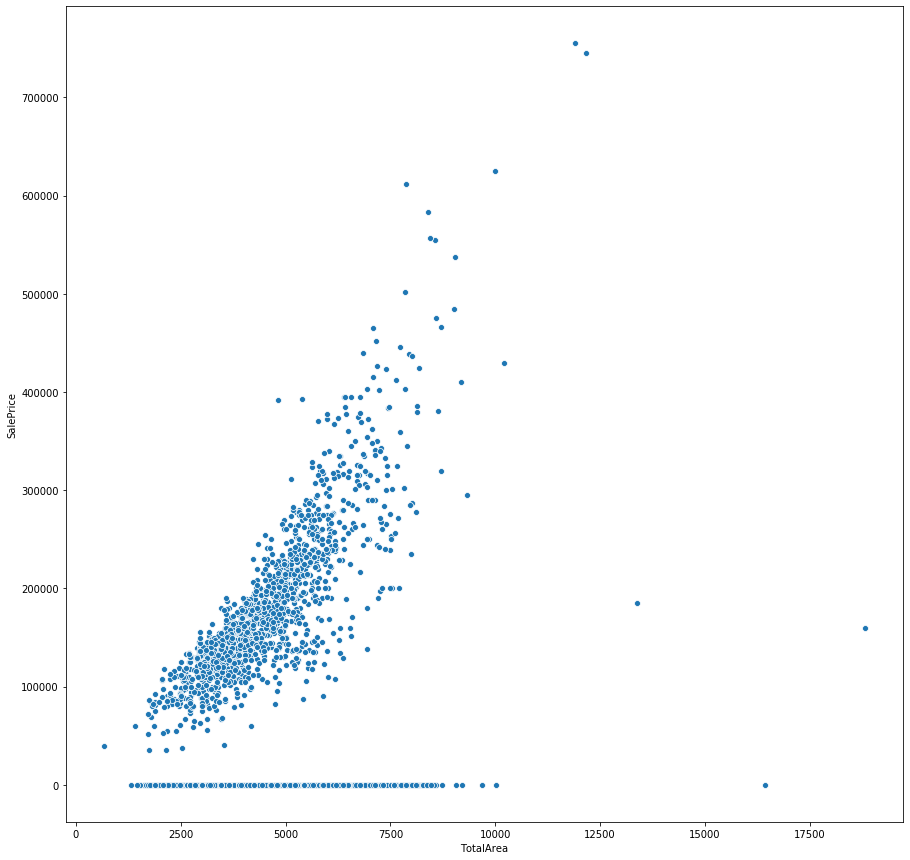

In [64]:
plt.figure(figsize= (15,15))
sns.scatterplot(x= cb['TotalArea'], y= cb['SalePrice'])

In [65]:
train= cb.loc[:1459,::]
test= cb.loc[1460:,::]
train.shape, test.shape

((1460, 313), (1459, 313))

In [66]:

train['SalePrice']=np.log(train['SalePrice'])*100
y= train['SalePrice']
x= train.drop('SalePrice', axis= 1)

test= test.drop('SalePrice', axis= 1)

C:\Users\91863\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
x.shape, y.shape, test.shape

((1460, 312), (1460,), (1459, 312))

In [68]:
steps= [
    ('poly', PolynomialFeatures(degree= 1)),
    ('model', Lasso(alpha=0.15, fit_intercept= True))
]
pipeline= Pipeline(steps)
pipeline.fit(x, y)
print(pipeline.score(x,y))
pred= pipeline.predict(test)
print(pred)

0.8996869109057551
[1167.15487426 1186.31017417 1205.81115304 ... 1199.79394357 1169.03380223
 1237.34213692]


C:\Users\91863\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 759.9907527740579, tolerance: 232.80065898865118
  positive)


In [69]:
param= {
    'n_estimators': 300,
    'max_depth': 3, 
    'learning_rate': 0.1,
    'criterion': 'mae',
    'min_impurity_decrease': 0.005,
    'loss': 'huber',
    'alpha': 0.99
}

Gbr= GradientBoostingRegressor(**param)
Gbr.fit(x,y)
print(Gbr.score(x,y))

pred1= Gbr.predict(test)
print(pred1)

0.9678870914052964
[1178.24497833 1193.32542404 1215.42559984 ... 1184.69981255 1171.89403966
 1232.25697129]


In [71]:
prediction= np.exp((pred+pred1)/200)
sub= pd.DataFrame({'Id': b.Id, 'SalePrice': prediction})

In [72]:
sub.to_csv('house_predict4.csv', index= False)

In [73]:
print('done')

done
